## Importing Libraries & Data

In [1]:
# import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data

df = pd.read_pickle("../data/usa_classified_tweets.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   150798 non-null  int64  
 1   text                 150798 non-null  object 
 2   location             150798 non-null  object 
 3   total_pop            150798 non-null  float64
 4   women                150798 non-null  float64
 5   hispanic             150798 non-null  float64
 6   white                150798 non-null  float64
 7   black                150798 non-null  float64
 8   native               150798 non-null  float64
 9   asian                150798 non-null  float64
 10  pacific              150798 non-null  float64
 11  income_per_cap       150798 non-null  float64
 12  poverty              150798 non-null  float64
 13  unemployment         150798 non-null  float64
 14  democrats            150798 non-null  float64
 15  republicans      

In [4]:
# drop unnecessary variables

df = df.drop(columns=['id', 'text', 'location', 'total_pop', 'republicans'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   women                150798 non-null  float64
 1   hispanic             150798 non-null  float64
 2   white                150798 non-null  float64
 3   black                150798 non-null  float64
 4   native               150798 non-null  float64
 5   asian                150798 non-null  float64
 6   pacific              150798 non-null  float64
 7   income_per_cap       150798 non-null  float64
 8   poverty              150798 non-null  float64
 9   unemployment         150798 non-null  float64
 10  democrats            150798 non-null  float64
 11  voting_age_citizens  150798 non-null  float64
 12  believer_denier      150798 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 15.0 MB


In [6]:
X = df.drop('believer_denier', axis=1)

y = df['believer_denier']

In [7]:
y.value_counts()

1    114667
0     36131
Name: believer_denier, dtype: int64

## Baseline Model (Accuracy: 76%, F1: 43%)

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7171
           1       0.76      1.00      0.87     22989

    accuracy                           0.76     30160
   macro avg       0.38      0.50      0.43     30160
weighted avg       0.58      0.76      0.66     30160



/opt/anaconda3/envs/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Save this model

pickle.dump(dummy, open('baseline_task2.pkl','wb'))

## Random Forest Classifier (RFC)

In [11]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.07      0.13      7171
           1       0.77      0.98      0.86     22989

    accuracy                           0.76     30160
   macro avg       0.66      0.53      0.50     30160
weighted avg       0.72      0.76      0.69     30160



## RFC + Undersampling

In [12]:
# Random Undersampling

# define undersampling strategy
rus = RandomUnderSampler()

# fit and apply the transform
X_rus, y_rus = rus.fit_resample(X, y)

# summarize class distribution
print(Counter(y_rus))

Counter({0: 36131, 1: 36131})


In [13]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      7201
           1       0.60      0.64      0.62      7252

    accuracy                           0.61     14453
   macro avg       0.61      0.61      0.61     14453
weighted avg       0.61      0.61      0.61     14453



## RFC + Oversampling

In [14]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

Counter({1: 114667, 0: 114667})


In [15]:
# run model and generate classification report

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     23040
           1       0.60      0.66      0.63     22827

    accuracy                           0.62     45867
   macro avg       0.62      0.62      0.62     45867
weighted avg       0.62      0.62      0.62     45867



In [16]:
# get ROC AUC scores

train_probs = model.predict_proba(X_train)[:,1] 
probs = model.predict_proba(X_test)[:, 1]
train_predictions = model.predict(X_train)

print(f'Train ROC AUC Score: {round(roc_auc_score(y_train, train_probs),2)}')
print(f'Test ROC AUC  Score: {round(roc_auc_score(y_test, probs),2)}')

Train ROC AUC Score: 0.67
Test ROC AUC  Score: 0.66


Baseline: {1.0} Test: {0.66} Train: {0.67}
Baseline: {0.5} Test: {0.6} Train: {0.61}
Baseline: {0.5} Test: {0.66} Train: {0.67}


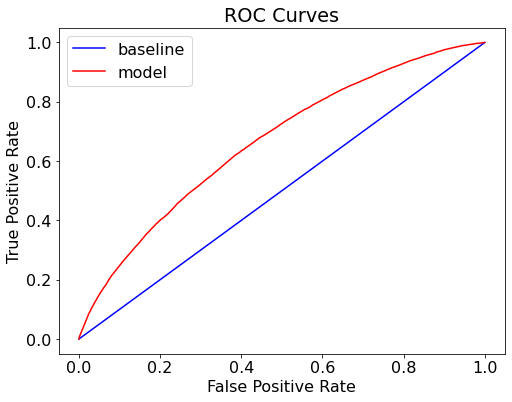

In [17]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print('Baseline:', {round(baseline[metric], 2)}, 
                 'Test:', {round(results[metric], 2)}, 
                 'Train:', {round(train_results[metric], 2)})
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
evaluate_model(y_pred,probs,train_predictions,train_probs)

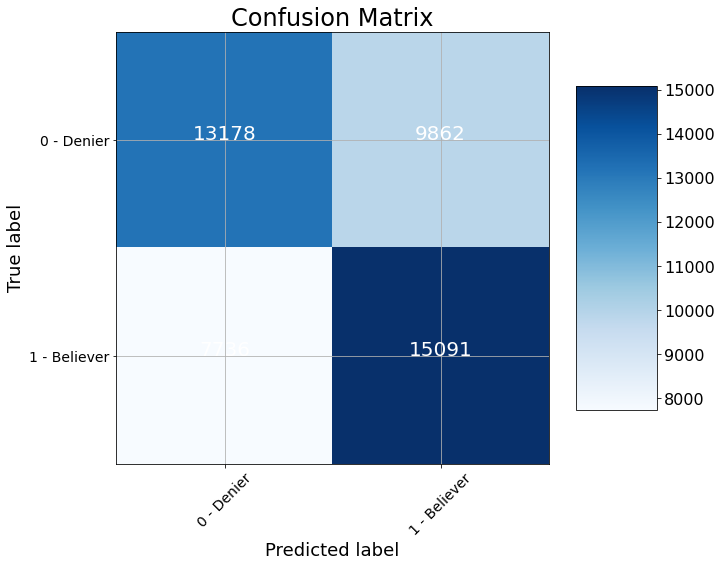

In [18]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Denier', '1 - Believer'],
                      title = 'Confusion Matrix')

## RFC Parameter Tuning

In [19]:
# train-test split (using oversampled dataset)

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state = 42)

rf=RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

## RFC Prediction and Feature Importance

In [20]:
# train model with best parameters

best_model = RandomForestClassifier(criterion='gini',
                                    max_depth=8,
                                    max_features='sqrt',
                                    n_estimators= 500)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61     23040
           1       0.61      0.62      0.61     22827

    accuracy                           0.61     45867
   macro avg       0.61      0.61      0.61     45867
weighted avg       0.61      0.61      0.61     45867



Feature: 0, Score: 0.05218
Feature: 1, Score: 0.04835
Feature: 2, Score: 0.05262
Feature: 3, Score: 0.07466
Feature: 4, Score: 0.01684
Feature: 5, Score: 0.10808
Feature: 6, Score: 0.01932
Feature: 7, Score: 0.14536
Feature: 8, Score: 0.03712
Feature: 9, Score: 0.03710
Feature: 10, Score: 0.35323
Feature: 11, Score: 0.05514


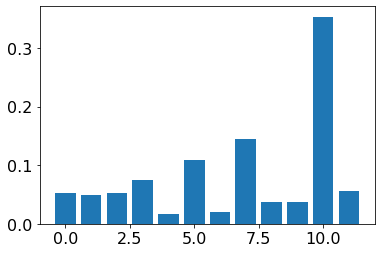

In [21]:
# Find scores that show how important each feature is

importance = best_model.feature_importances_

importances_dict = {}

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    importances_dict[i] = v

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
import pprint

importance_dic = {}

for feat, importance in zip(X.columns, best_model.feature_importances_):
    importance_dic[feat] = round(importance,3)
    
pprint.pprint(sorted(importance_dic.items(), key = lambda x: x[1], reverse = True))

[('democrats', 0.353),
 ('income_per_cap', 0.145),
 ('asian', 0.108),
 ('black', 0.075),
 ('voting_age_citizens', 0.055),
 ('white', 0.053),
 ('women', 0.052),
 ('hispanic', 0.048),
 ('poverty', 0.037),
 ('unemployment', 0.037),
 ('pacific', 0.019),
 ('native', 0.017)]


In [23]:
# import data again and this time remove the two worst performing variables (pacific and native)

df = pd.read_pickle("../data/usa_classified_tweets.pkl")

In [24]:
df = df.drop(columns=['id', 'text','location','total_pop', 'republicans',
                     'native','pacific'])

In [25]:
X = df.drop('believer_denier', axis=1)

y = df['believer_denier']

In [26]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

Counter({1: 114667, 0: 114667})


In [27]:
# fit the model again to see if performance increased

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state = 42)

best_model = RandomForestClassifier(criterion='entropy',
                                    max_depth=8,
                                    max_features='sqrt',
                                    n_estimators= 200)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61     23040
           1       0.61      0.62      0.61     22827

    accuracy                           0.61     45867
   macro avg       0.61      0.61      0.61     45867
weighted avg       0.61      0.61      0.61     45867



In [28]:
import pprint

importance_dic = {}

for feat, importance in zip(X.columns, best_model.feature_importances_):
    importance_dic[feat] = round(importance,3)
    
pprint.pprint(sorted(importance_dic.items(), key = lambda x: x[1], reverse = True))

[('democrats', 0.34),
 ('income_per_cap', 0.169),
 ('asian', 0.119),
 ('black', 0.077),
 ('white', 0.059),
 ('voting_age_citizens', 0.055),
 ('women', 0.049),
 ('hispanic', 0.049),
 ('unemployment', 0.042),
 ('poverty', 0.041)]


# Support Vector Classifier (SVC)

In [29]:
# import data again

df = pd.read_pickle("../data/usa_classified_tweets.pkl")

In [30]:
df = df.drop(columns=['id', 'text','location','total_pop', 'republicans'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   women                150798 non-null  float64
 1   hispanic             150798 non-null  float64
 2   white                150798 non-null  float64
 3   black                150798 non-null  float64
 4   native               150798 non-null  float64
 5   asian                150798 non-null  float64
 6   pacific              150798 non-null  float64
 7   income_per_cap       150798 non-null  float64
 8   poverty              150798 non-null  float64
 9   unemployment         150798 non-null  float64
 10  democrats            150798 non-null  float64
 11  voting_age_citizens  150798 non-null  float64
 12  believer_denier      150798 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 15.0 MB


In [32]:
# separate X and y

X = df.drop('believer_denier', axis=1)  
y = df['believer_denier']

In [33]:
# scale X

X = preprocessing.scale(X)

In [34]:
# SVC with no data manipulation (64% accuracy)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01      7171
           1       0.76      1.00      0.87     22989

    accuracy                           0.76     30160
   macro avg       0.69      0.50      0.44     30160
weighted avg       0.73      0.76      0.66     30160



## SVC + Random Undersampling


In [35]:
# initiating RandomUndersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

Counter({0: 36131, 1: 36131})


In [36]:
# running classifier (61% accuracy)

X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      7201
           1       0.62      0.59      0.60      7252

    accuracy                           0.61     14453
   macro avg       0.61      0.61      0.61     14453
weighted avg       0.61      0.61      0.61     14453



## SVC + RandomOversampling

In [37]:
ros = RandomOverSampler()

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({1: 114667, 0: 114667})


In [38]:
# running classifier

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.20)

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62     22796
           1       0.62      0.59      0.60     23071

    accuracy                           0.61     45867
   macro avg       0.61      0.61      0.61     45867
weighted avg       0.61      0.61      0.61     45867



## SVC Parameter Tuning

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.2, random_state = 42)

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf']}

grid = RandomizedSearchCV(SVC(),param_distributions=param_grid,cv=3,verbose=1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 36.2min finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=1)

In [41]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1)


In [42]:
# running classifier with best parameters

classifier = SVC(C=0.1, gamma=1, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      7201
           1       0.62      0.60      0.61      7252

    accuracy                           0.61     14453
   macro avg       0.61      0.61      0.61     14453
weighted avg       0.61      0.61      0.61     14453



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150798 entries, 0 to 150797
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   women                150798 non-null  float64
 1   hispanic             150798 non-null  float64
 2   white                150798 non-null  float64
 3   black                150798 non-null  float64
 4   native               150798 non-null  float64
 5   asian                150798 non-null  float64
 6   pacific              150798 non-null  float64
 7   income_per_cap       150798 non-null  float64
 8   poverty              150798 non-null  float64
 9   unemployment         150798 non-null  float64
 10  democrats            150798 non-null  float64
 11  voting_age_citizens  150798 non-null  float64
 12  believer_denier      150798 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 15.0 MB


Text(0.5, 0, 'Permutation Importance')

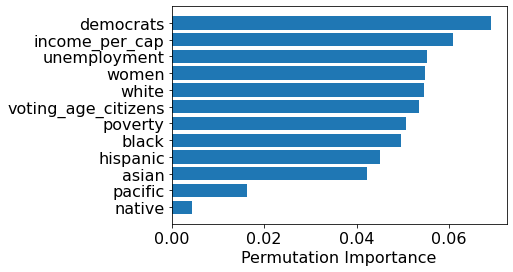

In [46]:
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(classifier, X_test, y_test)

feature_names = ['women','hispanic','white','black','native','asian','pacific',
                 'income_per_cap','poverty', 'unemployment', 'democrats', 'voting_age_citizens',
                 'believer_denier']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")